In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.optimize as opt
from scipy.optimize import curve_fit
import os
import re


In [3]:
def powerlaw(t,K,n,Af,tau):
    return Af*(1-np.exp(-K*np.power(t+tau,n)/Af))#/Af))


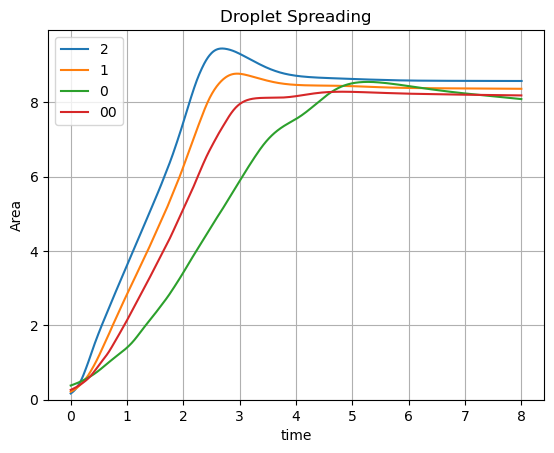

In [13]:
file_temp=next(os.walk('.'))[1]
cst=0
f_name=[""]
f_id=[""]
for temp in file_temp:
    match=re.search("data3_*",temp)
    if match:
        f_name.append(temp)
        f_id.append(temp.split('_')[1])
        f_id.append(temp.split('_')[2])
        
        cst=cst+1
f_name=np.array(f_name[1:])#,dtype=np.str)
f_id=np.array(f_id[1:],dtype=np.float32)
f_sorted=np.sort(f_id)
index=np.zeros(np.size(f_id)).astype('int32')
f_name_sorted=np.empty(np.size(f_name),dtype='<U14')
for i in range(np.size(f_id)):
    index[i]=np.where(f_id==f_sorted[i])[0][0].astype('int32')#,f_id)
    #f_name_sorted[i]=f_name[index[i]]
n=np.size(f_id)
fit_param=np.zeros([n,4])
i=0
for f in f_name:
    temp=pd.read_csv('./'+f+'/dropinfo',header=0,delimiter='\\s+')#,skiprows=1)
    data=temp[1:].astype('float32') # Drop first row and interpret data as floating point numbers. 
    # === Plot Data === #
    xdata=data['Time'].to_numpy()
    ydata=np.pi*np.power(data['Wetted'].to_numpy(),2)
    p=plt.plot(xdata,ydata,label=f.split('_')[3])
    # === Fit model === #
    #popt, pcov = curve_fit(powerlaw, data['Time'], np.pi*np.power(data['Wetted'],2),[1,0.5,1,8])
    popt, pcov = curve_fit(powerlaw, xdata, ydata,bounds=(10**-3,[10,10,10,2]))
    fit_param[i,:]=popt
    #p=plt.plot(xdata,powerlaw(xdata,popt[0],popt[1],popt[2],popt[3]),'--',color=p[0].get_color())
    i=i+1

plt.ylim([0,np.pi*np.power(np.max(data['Wetted']),2)*1.2])
plt.title('Droplet Spreading')
plt.xlabel('time')
plt.ylabel('Area')
plt.legend()
plt.grid()
plt.show()
    

In [ ]:
# K,n,Af,tau
a=plt.plot(np.log10(f_id),fit_param[:,0]/np.max(fit_param[:,0]),'-o',label='K')
a=plt.plot(np.log10(f_id),fit_param[:,1]/np.max(fit_param[:,1]),'-o',label='n')
a=plt.plot(np.log10(f_id),fit_param[:,2]/np.max(fit_param[:,2]),'-o',label='Af')
a=plt.plot(np.log10(f_id),fit_param[:,3]/np.max(fit_param[:,3]),'-o',label='tau')
plt.title('beta')
plt.xlabel('log beta')
plt.ylabel('normalized fit variables')
plt.legend()

plt.grid()
plt.show()

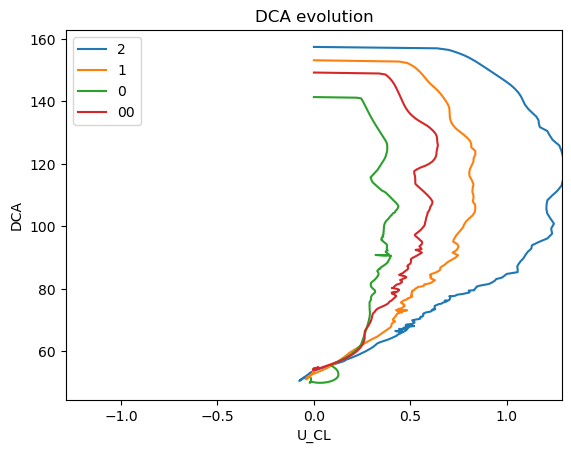

In [27]:
for f in f_name:
    temp=pd.read_csv('./'+f+'/dropinfo',header=0,delimiter='\\s+')#,skiprows=1)
    data=temp[1:].astype('float32') # Drop first row and interpret data as floating point numbers. 
    xdata=data['CL'].to_numpy()
    ydata=data['CA.1'].to_numpy()
    p=plt.plot(xdata,ydata,label=f.split('_')[3])
    plt.legend()
    plt.title('DCA evolution')
    plt.xlabel('U_CL')
    plt.ylabel('DCA')
    plt.xlim([-2*np.max(xdata),2*np.max(xdata)])
    plt.grid()
plt.show()
    

In [16]:
data

,Timestep,Time,VOF,VOF.1,Total,Drop,Wetted,CL,CA,CA.1,C,alpha
1,0.0,0.000000,1.0,0.0,4.18873,1.982600,0.231065,0.000000,2.748410,157.472000,0.231065,0.000000
2,1.0,0.006790,1.0,0.0,4.18911,1.982600,0.235398,0.638184,2.740690,157.029999,0.258055,0.018407
3,2.0,0.013579,1.0,0.0,4.18951,1.982600,0.240135,0.697667,2.731950,156.529007,0.284522,0.039451
4,3.0,0.020369,1.0,0.0,4.18990,1.982600,0.245069,0.726787,2.722550,155.990005,0.310054,0.060406
5,4.0,0.027158,1.0,0.0,4.19030,1.982600,0.250184,0.753252,2.712480,155.414001,0.335981,0.081768
...,...,...,...,...,...,...,...,...,...,...,...,...
1176,1175.0,7.977710,1.0,0.0,4.20232,0.894312,1.651600,-0.000205,0.941037,53.917500,1.654990,-0.000988
1177,1176.0,7.984500,1.0,0.0,4.20231,0.894313,1.651590,-0.000200,0.941041,53.917702,1.654920,-0.000969
1178,1177.0,7.991290,1.0,0.0,4.20231,0.894313,1.651590,-0.000200,0.941045,53.917900,1.654920,-0.000968
1179,1178.0,7.998080,1.0,0.0,4.20231,0.894313,1.651590,-0.000198,0.941048,53.918098,1.654890,-0.000959


In [18]:
np.max(ydata)

np.float32(70000.44)

In [36]:
# K,n,Af,tau
fit_param

array([[5.30037902e-01, 6.30834679e-01, 3.59550164e+00, 3.42524170e-02],
       [2.03964475e-01, 2.13751348e+00, 7.74362696e+00, 6.95567387e-01],
       [1.49548545e+00, 1.46967570e+00, 8.10311914e+00, 1.00000000e-03],
       [4.49041604e+00, 1.05884132e+00, 8.29380617e+00, 1.00000000e-03],
       [5.97011383e+00, 8.81841051e-01, 8.38774281e+00, 1.07507007e-02]])

In [40]:
f_sorted

array([0.05, 0.1 , 0.2 , 0.4 , 0.6 , 0.8 , 1.  , 5.  ], dtype=float32)

In [18]:
f_name


array(['monitor2_0.3', 'monitor2_0.05', 'monitor2_0.01', 'monitor2_0.1',
       'monitor2_1'], dtype='<U13')